<a href="https://colab.research.google.com/github/caohungphu/CS114.L21/blob/main/Colab/Predict_final_exam_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>CS114.L21 - MÁY HỌC - MACHINE LEARNING</b></h1>
<h1 align="center"><b>BÀI TẬP COLAB SỐ 03 (17/05/2021)</b></h1>
 
## **1. YÊU CẦU:**

- Data discovery


## **2. NHÓM THỰC HIỆN**
- Cao Hưng Phú - 19520214 - 19520214@gm.uit.edu.vn
- Nguyễn Thành Công - 19521294 - 19521294@gm.uit.edu.vn
- Trần Huỳnh Kỳ Anh - 19521216 - 19521216@gm.uit.edu.vn

## **3. LINK GITHUB**
- Link GitHub nhóm: https://github.com/caohungphu/CS114.L21/
- Link GitHub bài làm: [Predict_final_exam_score.ipynb](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Predict_final_exam_score.ipynb)
- Link GitHub dataset: [Dataset](https://github.com/caohungphu/CS114.L21/tree/main/Colab/CSV/17_05_2021)

## **4. SOURCE CODE**

### **4.1. Nguồn tham khảo**

1. Thư viện pandas: https://pandas.pydata.org/docs/
2. Merge trong pandas: [https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/](https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python)
3. Scatter: [https://stackoverflow.com/questions/51736396/](https://stackoverflow.com/questions/51736396/subplots-in-matplotlib-give-valueerror-not-enough-values-to-unpack/51736488)
4. Group by Multiple Columns: [https://jamesrledoux.com/code/group-by-aggregate-pandas](https://jamesrledoux.com/code/group-by-aggregate-pandas)
5. Iloc with condition: [https://stackoverflow.com/questions/50292460/how-to-apply-a-condition-to-pandas-iloc](https://stackoverflow.com/questions/50292460/how-to-apply-a-condition-to-pandas-iloc)

### **4.2. Code**

#### **4.2.1. Thêm thư viện, đọc dữ liệu**

In [1]:
# Thêm các thư viện cần thiết
import os
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
 
# Đường dẫn thư mục dataset
dir_dataset_folder = "/content/CS114.L21/Colab/CSV/17_05_2021/"
 
# Nếu không có đường dẫn thì clone từ GitHub về
if not os.path.exists(dir_dataset_folder):
    !git clone https://github.com/caohungphu/CS114.L21.git

In [2]:
# Đọc dữ liệu từ file CSV
wecode_data = pd.read_csv("/content/CS114.L21/Colab/CSV/17_05_2021/wecode.csv")
score_training_data = pd.read_csv("/content/CS114.L21/Colab/CSV/17_05_2021/score_training.csv")

In [3]:
# Check sơ wecode_data
wecode_data.head(10)

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
5,9,0,5,4,0,Compilation Error,0,100,solution-5,2,2020-10-30 11:16:57,2020-10-30 11:16:58
6,10,0,6,4,1,SCORE,10000,100,solution-6,2,2020-10-30 11:18:47,2020-10-30 11:18:55
7,11,0,7,4,1,SCORE,10000,100,solution-7,2,2020-10-30 11:20:07,2020-10-30 11:20:15
8,12,0,8,4,1,SCORE,10000,100,solution-8,2,2020-10-30 11:21:02,2020-10-30 11:21:10
9,13,0,9,4,1,SCORE,10000,100,solution-9,2,2020-10-30 11:21:36,2020-10-30 11:21:44


In [4]:
# Kiểm tra xem wecode_data có null hay không 
wecode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


In [5]:
# Check sơ score_training_data (Không có)
score_training_data.head(10)

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
5,30,10,10,9,9,9.3,8.63
6,34,,,9,6.5,,6.24
7,35,7,9.5,6,4.5,6.2,5.75
8,36,4.5,8,9,7,7.6,8.51
9,37,5.5,5.5,7.5,7.5,6.9,8.27


In [6]:
# Kiểm tra xem score_training_data có null hay không (Có null -> Xử lý sau)
score_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


In [7]:
# Lấy những cột cần thiết
wecode_data_new = wecode_data[['user_id', 'assignment_id', 'problem_id', 'is_final', 'status', 'pre_score', 'created_at']]
score_training_data_new = score_training_data[['id', 'CK']]

#### **4.2.2. Tiền xử lí dữ liệu**

In [8]:
# Hàm kiểm tra code đã solved chưa
def checkSolved(data):
  if (data['is_final'] == 1) and (data['pre_score'] == 10000):
    return 1
  return 0

# Thêm cột với điều kiện solved vào data
wecode_data_new['solved'] = wecode_data_new.apply(checkSolved, axis=1)


# Xóa những dòng duplicate của cùng 1 user giống problem_id nhưng khác assignment (Chắc do Practice)
# VD: user_id: 1868
wecode_data_new = wecode_data_new.drop_duplicates(subset=['user_id', 'problem_id', 'solved'])

In [9]:
# Góm nhóm những người cùng user_id để tính các giá trị cần thiết mới
groupByUserID = wecode_data_new.groupby(by='user_id', sort = True)

wecode_data_new_header = pd.DataFrame({
    # Số assignment_tries
    'assignment_tries': groupByUserID['assignment_id'].nunique(),  
    # Số problem_tries 
    'problem_tries': groupByUserID['problem_id'].nunique(),
    # Số problem_solved 
    'problem_solved': groupByUserID['solved'].apply(lambda x: (x==1).sum()),
    # Số submit 
    'submit_count': groupByUserID['problem_id'].count(),
    # Số lần pre_score = 10000 
    'pre_full_count': groupByUserID['pre_score'].apply(lambda x: (x==10000).sum()),
    # Tổng pre_score is_final = 1
    'sum_score_is_final': groupByUserID.apply(lambda x: x[x['is_final'] == 1]['pre_score'].sum())
})

# Thay index: user_id thành index mới và user_id thành một cột giá trị user_id
wecode_data_new_header = wecode_data_new_header.reset_index()

In [10]:
# Tính tổng thời gian hoàn thành problem của id (Time is_final - Time lần đầu nộp)

# Copy lại wecode_data_new và gán vào wecode_time
wecode_time = wecode_data_new.copy()


# Lấy bảng thời gian lần đầu nộp problem
# Group by Multiple Columns (4.1 .4 -> Mục 4)
wecode_time_first = wecode_time.groupby(['user_id', 'problem_id']).agg({'created_at': 'min'})
# Thay tên cột
wecode_time_first.columns = ['first_create_time']
# Sửa lại index bảng
wecode_time_first = wecode_time_first.reset_index()


# Bảng thời gian lần nộp is_final
# Get bảng is_final = 1 bằng iloc (4.1 -> Mục 5)
wecode_time_final = wecode_time.iloc[:, :].query('is_final == 1')
# Lấy cột cần thiết
wecode_time_final = wecode_time_final[['user_id', 'problem_id', 'created_at']]
# Thay tên cột
wecode_time_final.columns = ['user_id', 'problem_id', 'final_create_time']
# Sửa lại index bảng
wecode_time_final = wecode_time_final.reset_index()
# Xóa cột index thừa
wecode_time_final = wecode_time_final[['user_id', 'problem_id', 'final_create_time']]

# Merge 2 bảng thời gian thành bảng thời gian chính
wecode_full_time = pd.merge(wecode_time_first, wecode_time_final, how='inner', on=['user_id', 'problem_id'])
# Time = Time is_final - Time lần đầu nộp
wecode_full_time['time_final'] = pd.to_datetime(wecode_full_time['final_create_time']) - pd.to_datetime(wecode_full_time['first_create_time'])
# Group by user_id và tính tổng time của các problem
wecode_full_time = pd.DataFrame(wecode_full_time.groupby('user_id')['time_final'].sum()).reset_index()
# Chuyển về dạng int
wecode_full_time['time_final'] = wecode_full_time['time_final'].dt.total_seconds().astype(int)

In [11]:
# Đếm số assignment, problem, submit
number_of_assignment = wecode_data_new['assignment_id'].nunique()
number_of_problem = wecode_data_new['problem_id'].nunique()
number_of_submissions = len(wecode_data_new)

# Thêm cột solved_per_tries
wecode_data_new_header['solved_per_tries'] = wecode_data_new_header['problem_solved'] / wecode_data_new_header['problem_tries']
# Thêm cột problem_tries_per_problem
wecode_data_new_header['problem_tries_per_problems'] = wecode_data_new_header['problem_tries'] / number_of_problem
# Thêm cột assignment_tries_per_assignments
wecode_data_new_header['assignment_tries_per_assignments'] = wecode_data_new_header['assignment_tries'] / number_of_assignment
# P/s: 3 giá trị của cột trên gần = 1 là tốt

# Update Chỉ số ngày 24/05

# Tổng số đã submmit / tổng số submition
wecode_data_new_header['sub_per_total'] = wecode_data_new_header['submit_count'] / number_of_submissions

# Số lần (pre_score = 10000) / tổng số submition
wecode_data_new_header['pre_full_per_total'] = wecode_data_new_header['pre_full_count'] / number_of_submissions

# Update thêm chỉ số tổng thời gian các thời gian làm mỗi bài / số bài giải được
# Merge bảng wecode_data_new_header và bằng thời gian
wecode_data_new_header = pd.merge(wecode_data_new_header, wecode_full_time, how='inner', on=['user_id'])
# tổng thời gian các thời gian làm mỗi bài / số bài giải được
wecode_data_new_header['time_final_per_problem_solved'] = wecode_data_new_header['time_final'] / wecode_data_new_header['problem_solved']
# 0 / 0 sẽ ra null nên nhóm em fillna bằng max time_final_per_problem_solved cộng với 1 số ngẫu nhiên
#-> Nhóm em nghĩ rằng số càng lớn điểm càng nhỏ
wecode_data_new_header['time_final_per_problem_solved'] = wecode_data_new_header['time_final_per_problem_solved'].fillna(max(wecode_data_new_header['time_final_per_problem_solved']) + 19520214)

In [12]:
wecode_data_new_header 

,user_id,assignment_tries,problem_tries,problem_solved,submit_count,pre_full_count,sum_score_is_final,solved_per_tries,problem_tries_per_problems,assignment_tries_per_assignments,sub_per_total,pre_full_per_total,time_final,time_final_per_problem_solved
0,1,1,2,1,2,1,10000,0.500000,0.003155,0.003448,0.000014,0.000007,0,0.000000e+00
1,4,1,41,37,49,43,370000,0.902439,0.064669,0.003448,0.000350,0.000307,2095,5.662162e+01
2,5,4,5,3,5,3,30000,0.600000,0.007886,0.013793,0.000036,0.000021,0,0.000000e+00
3,6,4,88,84,109,87,840000,0.954545,0.138801,0.013793,0.000778,0.000621,89005,1.059583e+03
4,7,1,2,0,2,0,8571,0.000000,0.003155,0.003448,0.000014,0.000000,0,1.995549e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,1860,9,43,26,55,27,297332,0.604651,0.067823,0.031034,0.000393,0.000193,4445787,1.709918e+05
1152,1862,2,6,4,7,4,40000,0.666667,0.009464,0.006897,0.000050,0.000029,2232,5.580000e+02
1153,1864,5,63,28,79,28,349886,0.444444,0.099369,0.017241,0.000564,0.000200,711013,2.539332e+04
1154,1865,3,17,10,26,10,100000,0.588235,0.026814,0.010345,0.000186,0.000071,512416,5.124160e+04


In [13]:
# Thay header cho trùng với dữ liệu wecode
score_training_data_new.columns = ['user_id', 'CK']
# Thay đổi từ Object sang Numberic
score_training_data_new['CK'] = score_training_data_new['CK'].apply(pd.to_numeric, errors='coerce')

In [14]:
# Tạo 2 dataframe mới từ bộ dữ liệu điểm CK bị thiếu
score_train = score_training_data_new.dropna(how='any')
score_predict = score_training_data_new[score_training_data_new.isna().any(axis=1)]

# Thay giá trị index chạy từ 0
score_train = score_train.reset_index()
score_train = score_train.drop(columns=['index'])
score_predict = score_predict.reset_index()
score_predict = score_predict.drop(columns=['index'])

In [15]:
score_train.head(10)

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10.0
3,28,9.5
4,29,8.5
5,30,9.0
6,34,6.5
7,35,4.5
8,36,7.0
9,37,7.5


In [16]:
score_predict.head(10)

,user_id,CK
0,51,NaN
1,240,NaN
2,391,NaN
3,513,NaN
4,586,NaN
5,705,NaN
6,750,NaN
7,772,NaN
8,774,NaN
9,776,NaN


In [17]:
# Merge data với bộ dataset Wecode
training_data = pd.merge(score_train, wecode_data_new_header, how='inner', on='user_id')
predict_data = pd.merge(score_predict, wecode_data_new_header, how='inner', on='user_id')

In [18]:
training_data.head(10)

,user_id,CK,assignment_tries,problem_tries,problem_solved,submit_count,pre_full_count,sum_score_is_final,solved_per_tries,problem_tries_per_problems,assignment_tries_per_assignments,sub_per_total,pre_full_per_total,time_final,time_final_per_problem_solved
0,24,9.5,15,78,72,108,73,737411,0.923077,0.123028,0.051724,0.000771,0.000521,51507,715.375000
1,27,10.0,2,5,3,6,4,39000,0.600000,0.007886,0.006897,0.000043,0.000029,0,0.000000
2,29,8.5,13,80,72,121,72,754760,0.900000,0.126183,0.044828,0.000864,0.000514,2754824,38261.444444
3,34,6.5,11,84,81,124,81,810000,0.964286,0.132492,0.037931,0.000885,0.000578,3223673,39798.432099
4,35,4.5,25,147,140,209,143,1427000,0.952381,0.231861,0.086207,0.001492,0.001021,2041553,14582.521429
5,37,7.5,12,102,93,152,96,971120,0.911765,0.160883,0.041379,0.001085,0.000685,827763,8900.677419
6,40,8.0,14,191,186,307,191,1874500,0.973822,0.301262,0.048276,0.002192,0.001364,7671868,41246.602151
7,41,8.0,10,71,61,88,62,635888,0.859155,0.111987,0.034483,0.000628,0.000443,1060841,17390.836066
8,42,7.5,30,181,179,236,180,1790000,0.988950,0.285489,0.103448,0.001685,0.001285,4905484,27404.938547
9,43,6.0,15,98,94,169,99,968120,0.959184,0.154574,0.051724,0.001207,0.000707,22369776,237976.340426


In [19]:
predict_data.head(10)

,user_id,CK,assignment_tries,problem_tries,problem_solved,submit_count,pre_full_count,sum_score_is_final,solved_per_tries,problem_tries_per_problems,assignment_tries_per_assignments,sub_per_total,pre_full_per_total,time_final,time_final_per_problem_solved
0,51,NaN,5,39,38,61,39,380000,0.974359,0.061514,0.017241,0.000436,0.000278,78401,2063.184211
1,240,NaN,15,123,113,192,113,1139285,0.918699,0.194006,0.051724,0.001371,0.000807,9079093,80345.955752
2,391,NaN,14,111,101,171,101,1021571,0.909910,0.175079,0.048276,0.001221,0.000721,2870535,28421.138614
3,513,NaN,15,135,127,220,128,1272631,0.940741,0.212934,0.051724,0.001571,0.000914,4545357,35790.212598
4,586,NaN,15,124,120,183,120,1200000,0.967742,0.195584,0.051724,0.001307,0.000857,638496,5320.800000
5,705,NaN,14,114,114,184,117,1140000,1.000000,0.179811,0.048276,0.001314,0.000835,1227239,10765.254386
6,772,NaN,13,91,85,140,85,880888,0.934066,0.143533,0.044828,0.001000,0.000607,14138876,166339.717647
7,774,NaN,14,99,98,136,99,988888,0.989899,0.156151,0.048276,0.000971,0.000707,3543025,36153.316327
8,776,NaN,13,98,97,151,97,978888,0.989796,0.154574,0.044828,0.001078,0.000693,7687238,79249.876289
9,792,NaN,15,102,100,160,102,1013888,0.980392,0.160883,0.051724,0.001142,0.000728,4632665,46326.650000


#### **4.2.3. Visualize data**

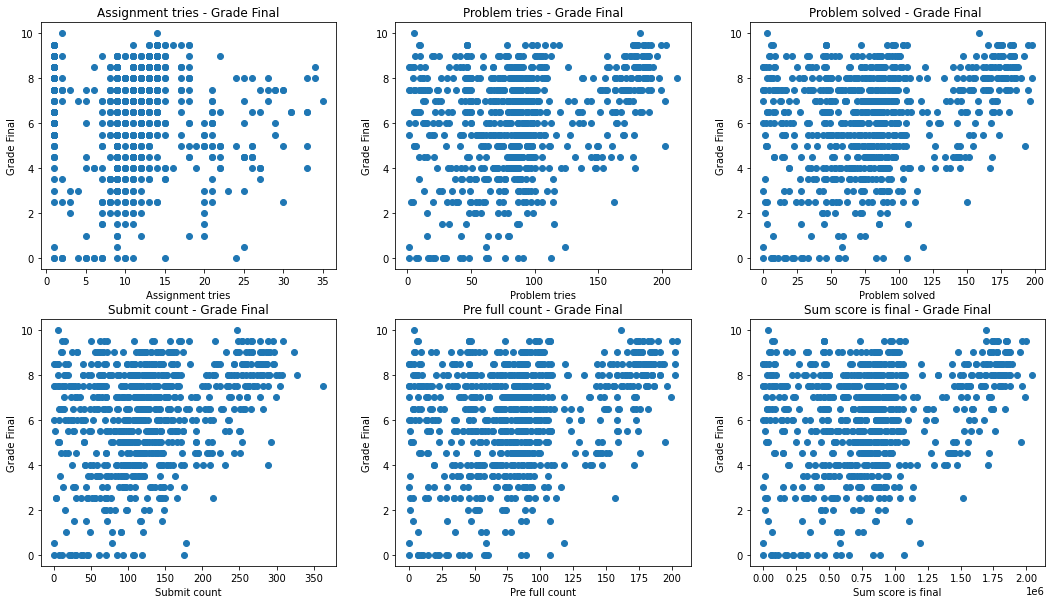

In [20]:
#Hiển thị bằng scatter
import matplotlib.pyplot as plt
fig, ((axs1, axs2, axs3), (axs4, axs5, axs6), ) = plt.subplots(2,3, figsize = (18,10))

# Phân bố tổng số assignment đã thử - Điểm cuối kỳ
axs1.scatter(x = training_data['assignment_tries'], y = training_data['CK'])
axs1.set_title("Assignment tries - Grade Final")
axs1.set(xlabel='Assignment tries', ylabel='Grade Final')

# Phân bố tổng số problem đã thử - Điểm cuối kỳ
axs2.scatter(x = training_data['problem_tries'], y = training_data['CK'])
axs2.set_title("Problem tries - Grade Final")
axs2.set(xlabel='Problem tries', ylabel='Grade Final')

# Phân bố tổng số problem đã hoàn thành - Điểm cuối kỳ
axs3.scatter(x = training_data['problem_solved'], y = training_data['CK'])
axs3.set_title("Problem solved - Grade Final ")
axs3.set(xlabel='Problem solved', ylabel='Grade Final')

# Phân bố tổng số lần nộp bài - Điểm cuối kỳ
axs4.scatter(x = training_data['submit_count'], y = training_data['CK'])
axs4.set_title("Submit count - Grade Final")
axs4.set(xlabel='Submit count', ylabel='Grade Final')

# Phân bố tổng số lần nộp bài đạt điểm tối đa - Điểm cuối kỳ
axs5.scatter(x = training_data['pre_full_count'], y = training_data['CK'])
axs5.set_title("Pre full count - Grade Final")
axs5.set(xlabel='Pre full count', ylabel='Grade Final')

# Phân bố tổng số điểm của các lần nộp bài is_final - Điểm cuối kỳ
axs6.scatter(x = training_data['sum_score_is_final'], y = training_data['CK'])
axs6.set_title("Sum score is final - Grade Final")
axs6.set(xlabel='Sum score is final', ylabel='Grade Final')

plt.show()

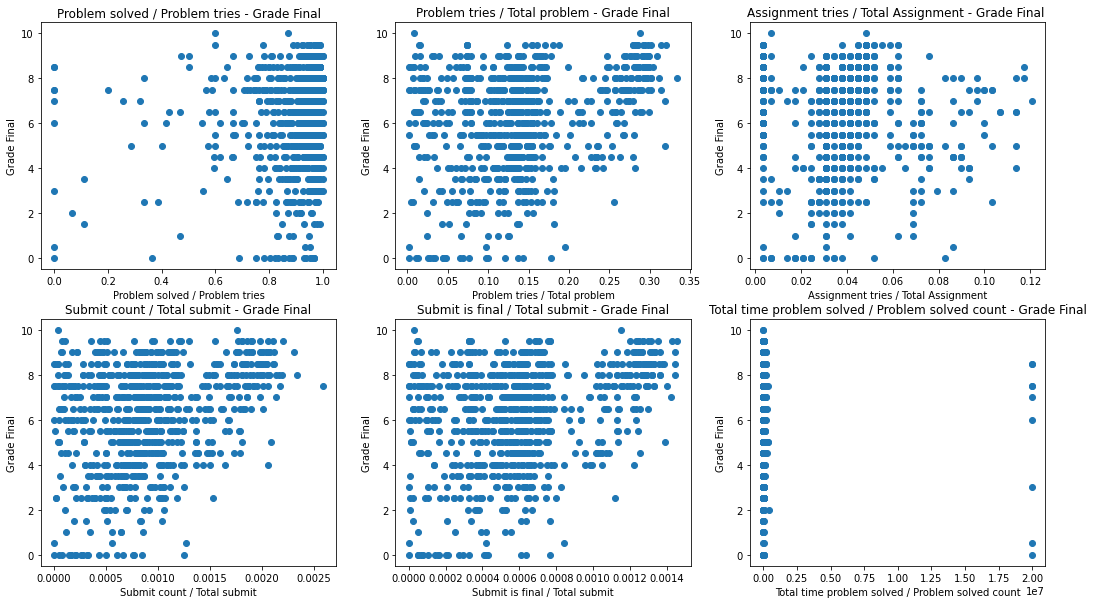

In [21]:
import matplotlib.pyplot as plt
fig, ((axs1, axs2, axs3), (axs4, axs5, axs6), ) = plt.subplots(2,3, figsize = (18,10))

# Phân bố problem đã hoàn thành / problem tries - Điểm cuối kỳ
axs1.scatter(x = training_data['solved_per_tries'], y = training_data['CK'])
axs1.set_title("Problem solved / Problem tries - Grade Final")
axs1.set(xlabel='Problem solved / Problem tries', ylabel='Grade Final')

# Phân bố problem tries / tổng số problem - Điểm cuối kỳ
axs2.scatter(x = training_data['problem_tries_per_problems'], y = training_data['CK'])
axs2.set_title("Problem tries / Total problem - Grade Final")
axs2.set(xlabel='Problem tries / Total problem', ylabel='Grade Final')

# Phân bố assignment tries / tổng số assignment - Điểm cuối kỳ
axs3.scatter(x = training_data['assignment_tries_per_assignments'], y = training_data['CK'])
axs3.set_title("Assignment tries / Total Assignment - Grade Final ")
axs3.set(xlabel='Assignment tries / Total Assignment', ylabel='Grade Final')

# Phân bố số submit / tổng số submit - Điểm cuối kỳ
axs4.scatter(x = training_data['sub_per_total'], y = training_data['CK'])
axs4.set_title("Submit count / Total submit - Grade Final")
axs4.set(xlabel='Submit count / Total submit', ylabel='Grade Final')

# Phân bố số lần full điểm / tổng số submit - Điểm cuối kỳ
axs5.scatter(x = training_data['pre_full_per_total'], y = training_data['CK'])
axs5.set_title("Submit is final / Total submit - Grade Final")
axs5.set(xlabel='Submit is final / Total submit', ylabel='Grade Final')

# Phân bố tổng thời gian các bài is_final / số bài is_final - Điểm cuối kỳ
axs6.scatter(x = training_data['time_final_per_problem_solved'], y = training_data['CK'])
axs6.set_title("Total time problem solved / Problem solved count - Grade Final")
axs6.set(xlabel='Total time problem solved / Problem solved count', ylabel='Grade Final')

plt.show()

#### **4.2.3. Thử nghiệm dữ liệu với SVR**

In [22]:
# Chuẩn bị model và xem kết quả training
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Làm tròn điểm số cuối kỳ
def x_round(x):
    x = np.round(x*2)/2
    return x

# Các cột để train
col_train = ['assignment_tries', 'problem_tries', 'problem_solved', 'submit_count', 'pre_full_count', 'sum_score_is_final',
             'solved_per_tries', 'problem_tries_per_problems', 'assignment_tries_per_assignments', 'sub_per_total',
             'pre_full_per_total', 'time_final', 'time_final_per_problem_solved']

# Xây dựng dữ liệu train
X = np.array(training_data[col_train])
y = np.array(training_data['CK'])

# Fit model
clf = SVR().fit(X, y)
y_predict = x_round(clf.predict(X))

# Đánh giá bằng MSE
print("MSE:",mean_squared_error(y, y_predict))

MSE: 4.605099502487562


In [23]:
# Dự đoán điểm cuối kỳ còn thiếu
predict_data['CK'] = x_round(clf.predict(predict_data[col_train]))
predict_data

,user_id,CK,assignment_tries,problem_tries,problem_solved,submit_count,pre_full_count,sum_score_is_final,solved_per_tries,problem_tries_per_problems,assignment_tries_per_assignments,sub_per_total,pre_full_per_total,time_final,time_final_per_problem_solved
0,51,5.5,5,39,38,61,39,380000,0.974359,0.061514,0.017241,0.000436,0.000278,78401,2063.184211
1,240,7.5,15,123,113,192,113,1139285,0.918699,0.194006,0.051724,0.001371,0.000807,9079093,80345.955752
2,391,7.0,14,111,101,171,101,1021571,0.909910,0.175079,0.048276,0.001221,0.000721,2870535,28421.138614
3,513,7.5,15,135,127,220,128,1272631,0.940741,0.212934,0.051724,0.001571,0.000914,4545357,35790.212598
4,586,6.5,15,124,120,183,120,1200000,0.967742,0.195584,0.051724,0.001307,0.000857,638496,5320.800000
5,705,6.5,14,114,114,184,117,1140000,1.000000,0.179811,0.048276,0.001314,0.000835,1227239,10765.254386
6,772,7.0,13,91,85,140,85,880888,0.934066,0.143533,0.044828,0.001000,0.000607,14138876,166339.717647
7,774,7.0,14,99,98,136,99,988888,0.989899,0.156151,0.048276,0.000971,0.000707,3543025,36153.316327
8,776,7.5,13,98,97,151,97,978888,0.989796,0.154574,0.044828,0.001078,0.000693,7687238,79249.876289
9,792,7.0,15,102,100,160,102,1013888,0.980392,0.160883,0.051724,0.001142,0.000728,4632665,46326.650000


## **5. NHẬN XÉT VÀ TRẢ LỜI YÊU CẦU ĐỀ BÀI**

### **5.1. Nhận xét**


### **5.2. Trả lời yêu cầu đề bài**
